# Credit Card Behaviour Score Prediction Using Classification and Risk-Based Techniques

**Objective**: To develop a forward-looking Behaviour Score model that flags potential credit card defaulters, helping the bank take proactive actions based on risk.


#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

#Data Loading and Preprocessing

In [ ]:
df = pd.read_csv('/content/train_dataset_final1.csv')

In [ ]:
val_df=pd.read_csv('/content/validate_dataset_final.csv')

In [ ]:
df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float64
 16  Bill

In [ ]:
df.shape

(25247, 27)

In [ ]:
df.isnull().sum()

,0
Customer_ID,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,126
pay_0,0
pay_2,0
pay_3,0
pay_4,0


only age column has null values

In [ ]:
df.describe()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25121.000000,25247.000000,25247.000000,25247.000000,25247.000000,...,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000
mean,17640.000000,1.551907,0.604111,1.852101,168342.060443,35.438199,-0.042857,-0.159544,-0.190359,-0.241415,...,38806.221029,5718.624966,6.047352e+03,5288.910651,4865.960834,4906.766828,5270.499287,44859.647485,0.362962,0.190399
std,7288.325459,0.522629,0.489050,0.797379,129892.784807,9.174998,1.099315,1.173990,1.172636,1.146753,...,59182.792531,16806.842125,2.400962e+04,17851.879609,15979.116544,15860.726852,17960.816915,62819.226119,5.047206,0.392624
min,5017.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.170000,-546.930000,0.000000
25%,11328.500000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1241.710000,999.985000,9.219100e+02,399.990000,300.150000,262.365000,130.070000,4858.670000,0.040000,0.000000
50%,17640.000000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,17102.580000,2145.020000,2.026830e+03,1844.300000,1500.100000,1513.790000,1500.040000,21102.830000,0.090000,0.000000
75%,23951.500000,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,49245.195000,5031.150000,5.000190e+03,4600.640000,4014.990000,4099.890000,4018.780000,57136.580000,0.590000,0.000000
max,30263.000000,3.000000,1.000000,6.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,...,961663.620000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000,877313.830000,205.380000,1.000000


(array([4.273e+03, 6.934e+03, 5.526e+03, 4.028e+03, 2.148e+03, 1.509e+03,
        5.300e+02, 1.360e+02, 3.300e+01, 4.000e+00]),
 array([21. , 26.8, 32.6, 38.4, 44.2, 50. , 55.8, 61.6, 67.4, 73.2, 79. ]),
 <BarContainer object of 10 artists>)

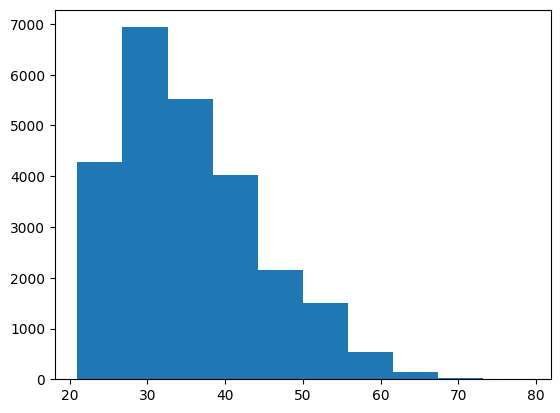

In [ ]:
plt.hist(df['age'],bins=10)

In [ ]:
df['age'].median()

34.0

Replacing null values by median value

In [ ]:
df['age'].replace(np.nan,df['age'].median(),inplace=True)

In [ ]:
df.isnull().sum()

,0
Customer_ID,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,0
pay_0,0
pay_2,0
pay_3,0
pay_4,0


In [ ]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        5016 non-null   int64  
 1   marriage           5016 non-null   int64  
 2   sex                5016 non-null   int64  
 3   education          5016 non-null   int64  
 4   LIMIT_BAL          5016 non-null   int64  
 5   age                5016 non-null   int64  
 6   pay_0              5016 non-null   int64  
 7   pay_2              5016 non-null   int64  
 8   pay_3              5016 non-null   int64  
 9   pay_4              5016 non-null   int64  
 10  pay_5              5016 non-null   int64  
 11  pay_6              5016 non-null   int64  
 12  Bill_amt1          5016 non-null   float64
 13  Bill_amt2          5016 non-null   float64
 14  Bill_amt3          5016 non-null   float64
 15  Bill_amt4          5016 non-null   float64
 16  Bill_amt5          5016 

In [ ]:
df['age'].value_counts()

,count
age,
29.0,1353
27.0,1258
28.0,1188
30.0,1162
34.0,1105
26.0,1049
31.0,1027
25.0,976
33.0,976


In [ ]:
df['age']=df['age'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25247 non-null  int64  
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float64
 16  Bill

#Exploratory data analysis (EDA)

<Axes: ylabel='count'>

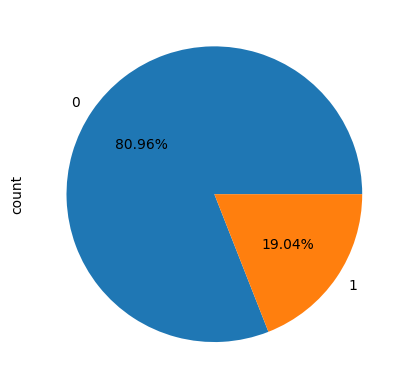

In [ ]:
df['next_month_default'].value_counts().plot(kind='pie',autopct='%1.2f%%')

highly imbalanced data

In [ ]:
df.corr()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
Customer_ID,1.000000,-0.017393,0.004581,0.006501,0.009806,-0.000578,-0.011331,-0.003328,-0.006770,-0.001087,...,-0.002228,-0.006424,0.004651,-0.006785,-0.005603,0.003255,-0.008008,0.000196,0.005761,-0.001893
marriage,-0.017393,1.000000,-0.031876,-0.149530,-0.102085,-0.413662,0.020694,0.023440,0.031506,0.031848,...,-0.017913,-0.005005,-0.005017,-0.002042,-0.014098,0.000770,-0.005885,-0.023068,-0.001925,-0.025677
sex,0.004581,-0.031876,1.000000,0.019173,0.023435,-0.089775,-0.051158,-0.066689,-0.060550,-0.060808,...,-0.013528,-0.001455,-0.001267,-0.007061,-0.002165,-0.003130,-0.005151,-0.023827,0.009846,-0.037537
education,0.006501,-0.149530,0.019173,1.000000,-0.220720,0.174701,0.105422,0.126021,0.113370,0.108537,...,-0.010858,-0.041479,-0.027946,-0.036983,-0.037789,-0.040498,-0.036625,0.007969,-0.012286,0.026943
LIMIT_BAL,0.009806,-0.102085,0.023435,-0.220720,1.000000,0.142283,-0.268792,-0.294822,-0.283323,-0.264973,...,0.292499,0.196326,0.174857,0.211922,0.202445,0.217782,0.217456,0.302158,0.028419,-0.146010
age,-0.000578,-0.413662,-0.089775,0.174701,0.142283,1.000000,-0.041480,-0.053802,-0.053781,-0.046872,...,0.046769,0.023495,0.022196,0.028274,0.023129,0.022756,0.020710,0.055521,0.000630,0.017703
pay_0,-0.011331,0.020694,-0.051158,0.105422,-0.268792,-0.041480,1.000000,0.667648,0.569559,0.535307,...,0.176039,-0.075146,-0.065768,-0.067040,-0.063562,-0.052644,-0.056000,0.192420,-0.053761,0.312943
pay_2,-0.003328,0.023440,-0.066689,0.126021,-0.294822,-0.053802,0.667648,1.000000,0.766510,0.662837,...,0.218701,-0.079962,-0.055125,-0.051767,-0.045585,-0.032368,-0.034709,0.239527,-0.040970,0.252125
pay_3,-0.006770,0.031506,-0.060550,0.113370,-0.283323,-0.053781,0.569559,0.766510,1.000000,0.775747,...,0.222844,0.005069,-0.063653,-0.051070,-0.045088,-0.030403,-0.035709,0.238982,-0.039154,0.226015
pay_4,-0.001087,0.031848,-0.060808,0.108537,-0.264973,-0.046872,0.535307,0.662837,0.775747,1.000000,...,0.241398,-0.004862,-0.000758,-0.063861,-0.042891,-0.029602,-0.027231,0.249515,-0.034663,0.207488


correlation map

<Axes: >

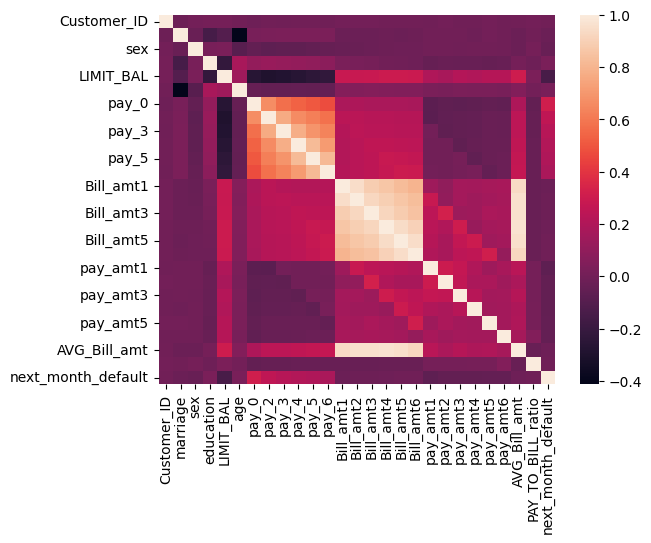

In [ ]:
sns.heatmap(df.corr())

#Analyze Demographic Features (sex, marriage, education, age)

a. Gender vs Default

In [ ]:
df['sex'].value_counts()

,count
sex,
1,15252
0,9995


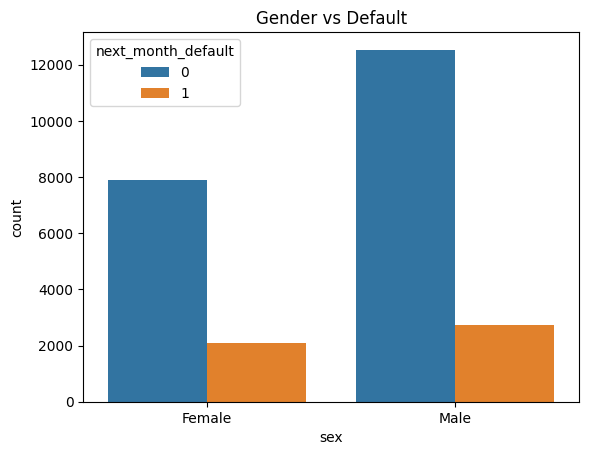

In [ ]:
sns.countplot(x='sex', hue='next_month_default', data=df)
plt.title("Gender vs Default")
plt.xticks([0,1], ['Female','Male'])
plt.show()

🔹 Female Customers: Around 8,000 females did not default, while ~2,000 did.

🔹 Male Customers: Around 12,500 males did not default, while ~2,800 did.

Insights: The number of male credit card holders is higher.

But female customers have a slightly higher default rate (~20% vs ~18.3%).

Although subtle, this can be an important feature in a classification model.

b. Marital Status vs Default

In [ ]:
df['marriage'].value_counts()

,count
marriage,
2,13441
1,11480
3,273
0,53


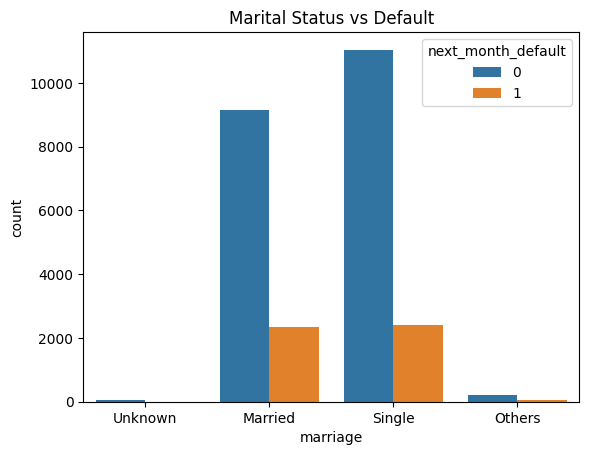

In [ ]:
sns.countplot(x='marriage', hue='next_month_default', data=df)
plt.title("Marital Status vs Default")
plt.xticks([0,1,2,3], ['Unknown','Married','Single','Others'])
plt.show()

In [ ]:

df.loc[df['marriage'] == 0, 'marriage'] = 3
df['marriage'].value_counts()

,count
marriage,
2,13441
1,11480
3,326


In [ ]:
val_df['marriage'].value_counts()

,count
marriage,
2,2702
1,2262
3,43
0,9


unknown and others dont have much value so i merged both by single value

In [ ]:
val_df.loc[val_df['marriage'] == 0, 'marriage'] = 3
val_df['marriage'].value_counts()

,count
marriage,
2,2702
1,2262
3,52


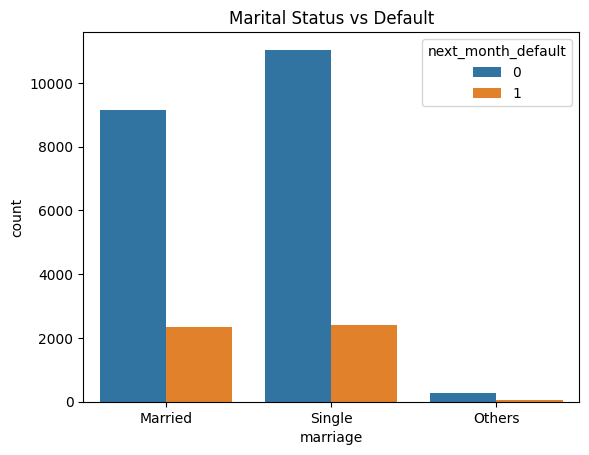

In [ ]:
sns.countplot(x='marriage', hue='next_month_default', data=df)
plt.title("Marital Status vs Default")
plt.xticks([0,1,2], ['Married','Single','Others'])
plt.show()

c. Education vs Default

In [ ]:
df['education'].value_counts()

,count
education,
2,11717
1,8988
3,4115
5,253
4,116
6,44
0,14


In [ ]:
val_df['education'].value_counts()

,count
education,
2,2374
1,1796
3,760
5,54
4,20
6,10
0,2


In [ ]:

df.loc[(df['education'] == 5) | (df['education'] == 6) | (df['education'] == 0), 'education'] = 4
df['education'].value_counts()

,count
education,
2,11717
1,8988
3,4115
4,427


In [ ]:

val_df.loc[(val_df['education'] == 5) | (val_df['education'] == 6) | (val_df['education'] == 0), 'education'] = 4
val_df['education'].value_counts()

,count
education,
2,2374
1,1796
3,760
4,86


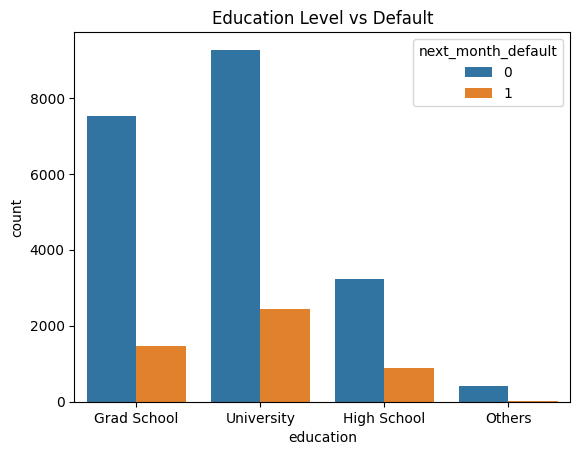

In [ ]:
sns.countplot(x='education', hue='next_month_default', data=df)
plt.title("Education Level vs Default")
plt.xticks([0,1,2,3], ['Grad School','University','High School','Others'])
plt.show()

#Analyze Financial Features

a. LIMIT_BAL Distribution

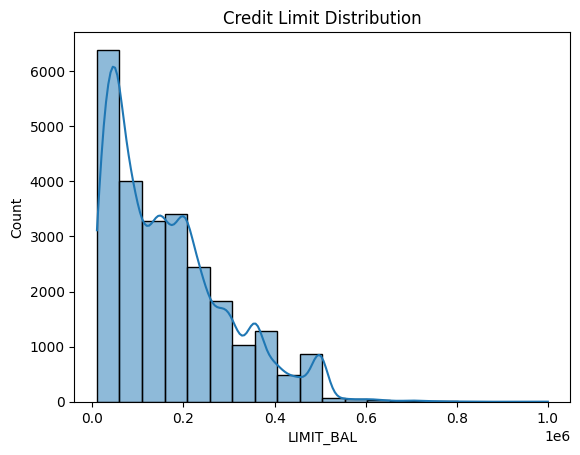

In [ ]:
sns.histplot(df['LIMIT_BAL'], kde=True, bins=20)
plt.title("Credit Limit Distribution")
plt.show()

<Axes: xlabel='next_month_default', ylabel='LIMIT_BAL'>

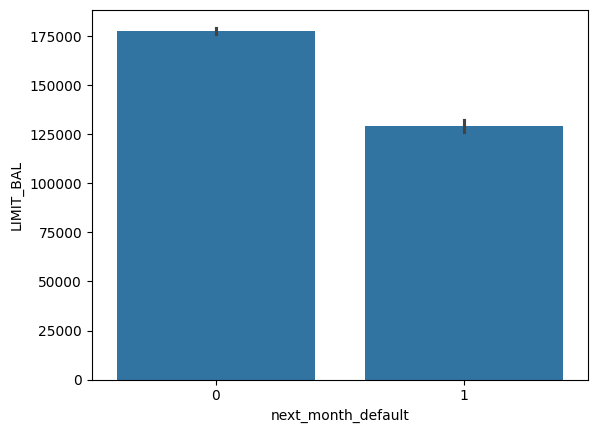

In [ ]:
sns.barplot(x='next_month_default', y='LIMIT_BAL', data=df)

#### 🔍 Insight:
Customers who defaulted tend to have significantly lower average credit limits than non-defaulters. This suggests that credit limit is inversely correlated with default risk and could serve as a strong predictive feature.


#Analyze Repayment Behavior

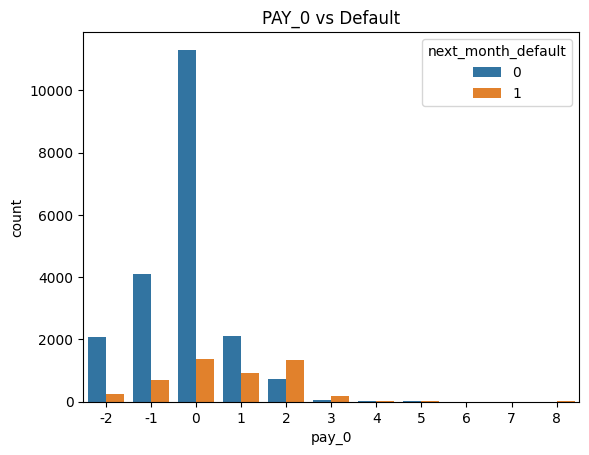

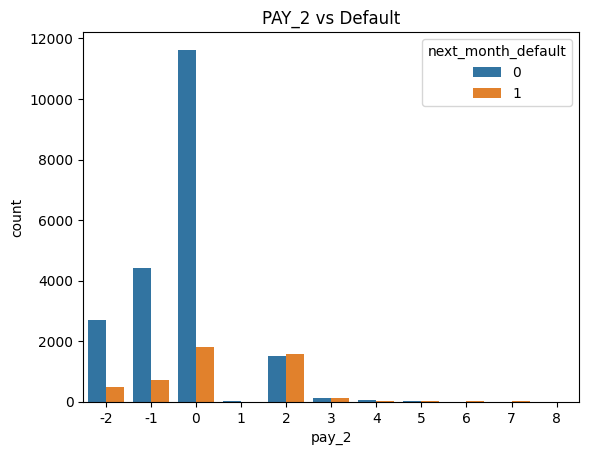

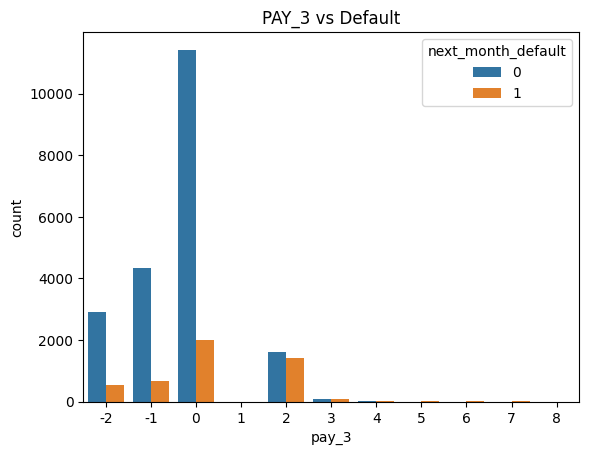

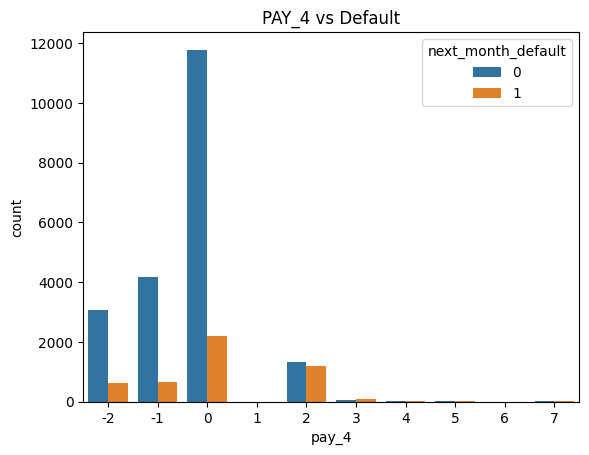

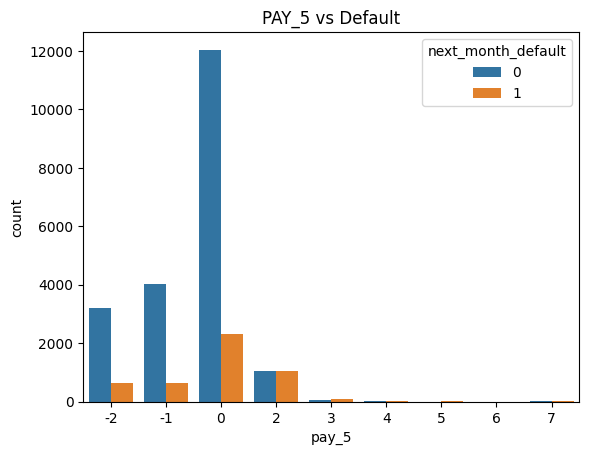

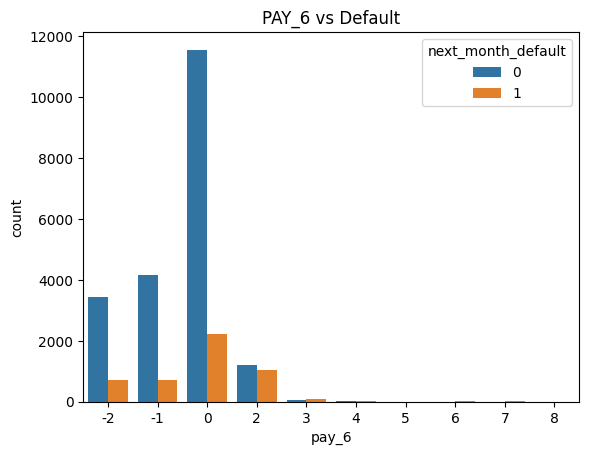

In [ ]:
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

for col in pay_cols:
    sns.countplot(x=col, hue='next_month_default', data=df)
    plt.title(f"{col.upper()} vs Default")
    plt.show()

The `pay_0` to `pay_5` features represent the repayment status of customers for the last six months, with the following encoding:

- `-2`: No bill generated
- `-1`: Bill paid in full
- `0`: Paid minimum due or not delayed
- `1, 2, 3, ...`: Number of months payment was delayed

These are critical behavioral indicators for understanding a customer's financial discipline and predicting their likelihood of default.

#### Key Insights:

- **Higher payment delay (`pay_m ≥ 1`) is strongly associated with default behavior.**
- **Non-defaulters** mostly have `pay_m` values of `-1` or `0`, indicating full or timely payments.
- **Defaulters** often exhibit a pattern of overdue payments across several months, not just in `pay_0`.
- This trend supports the creation of engineered features like:
  - `avg_pay_delay` — average delay over months
  - `recent_default_flag` — if customer delayed recently
  - `payment_consistency` — count of consecutive timely payments

These patterns show the value in not just examining one month of payment behavior, but observing trends over time to better capture credit risk.


#Bill Amounts & Payment Trends

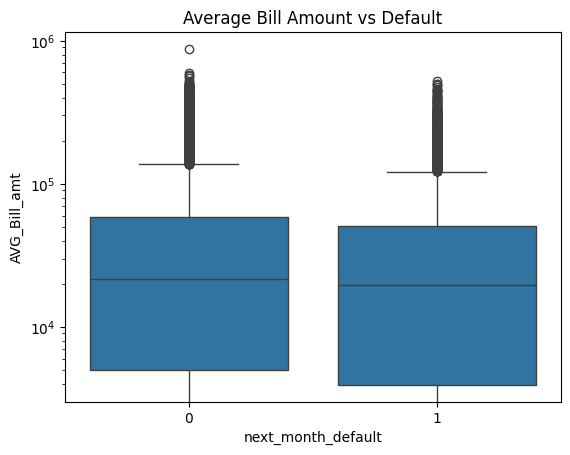

In [ ]:
sns.boxplot(x='next_month_default', y='AVG_Bill_amt', data=df)
plt.title("Average Bill Amount vs Default")
plt.yscale("log")
plt.show()

Customers who did not default generally have a higher median average bill amount than those who defaulted. This suggests that higher billing may correlate with better repayment behavior, possibly due to better financial capacity. However, due to overlapping ranges and outliers, this feature is more informative when combined with others like payment history.

#PAY_TO_BILL_ratio

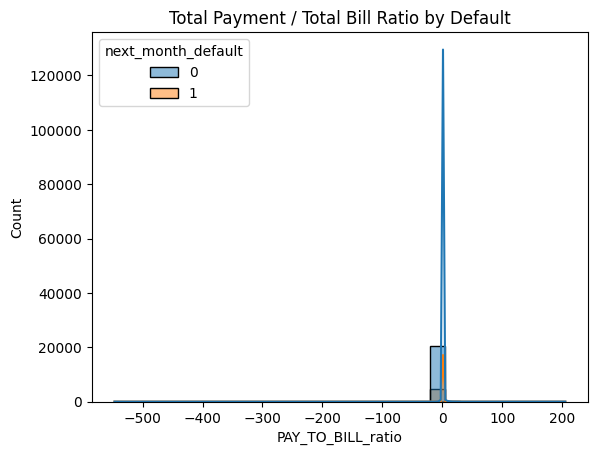

In [ ]:
sns.histplot(data=df, x='PAY_TO_BILL_ratio', hue='next_month_default', bins=30, kde=True)
plt.title("Total Payment / Total Bill Ratio by Default")
plt.show()

In [ ]:
df=df.astype('int')

In [ ]:
val_df=val_df.astype('int')

In [ ]:
val_df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
0,1,1,1,2,220000,32,0,0,0,0,...,17831,15670,2000,3999,1419,1999,3000,30788,23456,0
1,2,2,0,1,350000,35,-1,-1,-1,0,...,10832,2261,33891,16267,4026,234,1565,26346,13660,1
2,3,2,1,1,310000,39,0,0,0,0,...,240520,246524,11026,10499,14000,10000,10000,10000,258034,0
3,4,1,0,2,20000,47,0,0,0,2,...,15040,14749,1200,2799,0,1499,0,1000,13333,0
4,5,2,1,2,500000,30,0,0,0,0,...,69054,64841,25463,43095,7521,9065,8841,12000,77204,0


#Handle Class Imbalance Using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()


x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['next_month_default'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 25247
Resampled dataset shape 40880


In [ ]:
x_smote

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
0,5017,2,0,2,60000,25,2,2,2,0,...,22191,20750,2000,0,1134,1821,1500,1500,41511,0
1,5018,2,1,1,290000,24,0,0,-2,-2,...,2700,1350,0,0,0,2700,0,1349,2534,0
2,5019,1,0,2,180000,63,0,0,0,0,...,51902,52991,2086,2199,1845,2000,1923,1999,50422,0
3,5020,1,1,2,210000,43,0,0,0,0,...,80416,76945,3348,3380,3400,2683,2744,2892,86229,0
4,5021,2,0,1,280000,32,-2,-2,-2,-2,...,2099,1,999,3186,45027,2100,0,0,11814,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40875,23785,1,0,2,50000,33,2,2,2,2,...,48541,50863,607,3449,496,1350,3903,0,49671,0
40876,14910,1,0,2,20000,28,0,0,0,0,...,289,42,1178,2392,473,290,43,299,4619,0
40877,10571,1,1,2,50000,30,0,0,0,0,...,32394,51117,1148,1748,1875,3097,0,1600,32840,0
40878,19448,2,1,1,265713,26,0,0,0,0,...,17840,22675,47341,21680,8982,14849,20967,13580,40616,0


In [ ]:
y_smote.value_counts()

,count
next_month_default,
0,20440
1,20440


In [ ]:
columns = list(df.columns)

In [ ]:
columns.pop()

'next_month_default'

In [ ]:
smote_df = pd.DataFrame(x_smote, columns=columns)

In [ ]:
smote_df['next_month_default'] = y_smote

In [ ]:
df_fe =smote_df.copy()

#Feature Engineering

In [ ]:
df_fe['Payement_Value'] = df_fe['pay_0'] + df_fe['pay_2'] + df_fe['pay_3'] + df_fe['pay_4'] + df_fe['pay_5'] + df_fe['pay_6']

In [ ]:
val_df_copy=val_df.copy()

In [ ]:
val_df_copy['Payement_Value'] = val_df_copy['pay_0'] + val_df_copy['pay_2'] + val_df_copy['pay_3'] + val_df_copy['pay_4'] + val_df_copy['pay_5'] + val_df_copy['pay_6']

<Axes: xlabel='next_month_default', ylabel='Payement_Value'>

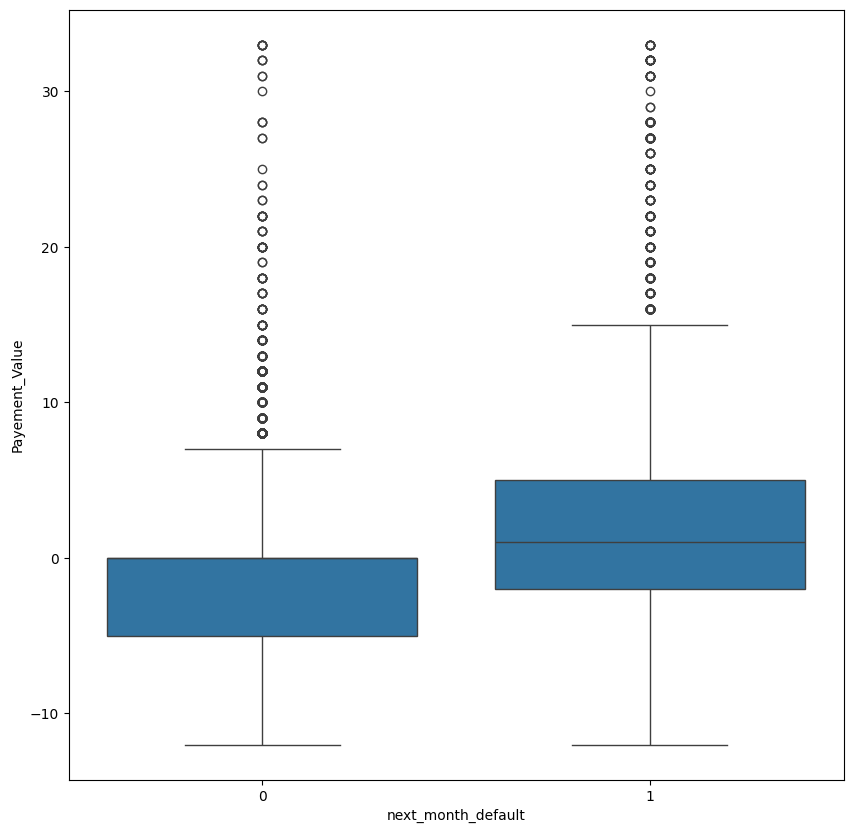

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df_fe, x = 'next_month_default', y = 'Payement_Value' )

In [ ]:
df_fe['Dues'] = (df_fe['Bill_amt1']+df_fe['Bill_amt2']+df_fe['Bill_amt3']+df_fe['Bill_amt4']+df_fe['Bill_amt5']+df_fe['Bill_amt6'])-(df_fe['pay_amt1']+df_fe['pay_amt2']+df_fe['pay_amt3']+df_fe['pay_amt4']+df_fe['pay_amt5']+df_fe['pay_amt6'])

In [ ]:
val_df_copy['Dues'] = (val_df_copy['Bill_amt1']+val_df_copy['Bill_amt2']+val_df_copy['Bill_amt3']+val_df_copy['Bill_amt4']+val_df_copy['Bill_amt5']+val_df_copy['Bill_amt6'])-(val_df_copy['pay_amt1']+val_df_copy['pay_amt2']+val_df_copy['pay_amt3']+val_df_copy['pay_amt4']+val_df_copy['pay_amt5']+val_df_copy['pay_amt6'])

In [ ]:
df_fe.groupby('next_month_default')['Dues'].mean()

,Dues
next_month_default,
0,237151.270108
1,236362.777886


In [ ]:
df_fe['education'].unique()

array([2, 1, 3, 4])

#OHE

In [ ]:
df_fe = pd.get_dummies(df_fe, columns = ['pay_0',	'pay_2',	'pay_3',	'pay_4',	'pay_5',	'pay_6'], drop_first = True )

In [ ]:
val_df_copy = pd.get_dummies(val_df_copy, columns = ['pay_0',	'pay_2',	'pay_3',	'pay_4',	'pay_5',	'pay_6'], drop_first = True )

In [ ]:
df_fe.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,...,pay_6_-1,pay_6_0,pay_6_1,pay_6_2,pay_6_3,pay_6_4,pay_6_5,pay_6_6,pay_6_7,pay_6_8
0,5017,2,0,2,60000,25,60323,60728,56472,28602,...,False,True,False,False,False,False,False,False,False,False
1,5018,2,1,1,290000,24,11157,0,0,0,...,False,True,False,False,False,False,False,False,False,False
2,5019,1,0,2,180000,63,47930,48921,50034,50748,...,False,True,False,False,False,False,False,False,False,False
3,5020,1,1,2,210000,43,91152,92916,90652,85295,...,False,True,False,False,False,False,False,False,False,False
4,5021,2,0,1,280000,32,19666,999,3186,44932,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_fe.columns

Index(['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age',
       'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5',
       'Bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5',
       'pay_amt6', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default',
       'Payement_Value', 'Dues', 'pay_0_-1', 'pay_0_0', 'pay_0_1', 'pay_0_2',
       'pay_0_3', 'pay_0_4', 'pay_0_5', 'pay_0_6', 'pay_0_7', 'pay_0_8',
       'pay_2_-1', 'pay_2_0', 'pay_2_1', 'pay_2_2', 'pay_2_3', 'pay_2_4',
       'pay_2_5', 'pay_2_6', 'pay_2_7', 'pay_2_8', 'pay_3_-1', 'pay_3_0',
       'pay_3_1', 'pay_3_2', 'pay_3_3', 'pay_3_4', 'pay_3_5', 'pay_3_6',
       'pay_3_7', 'pay_3_8', 'pay_4_-1', 'pay_4_0', 'pay_4_1', 'pay_4_2',
       'pay_4_3', 'pay_4_4', 'pay_4_5', 'pay_4_6', 'pay_4_7', 'pay_5_-1',
       'pay_5_0', 'pay_5_1', 'pay_5_2', 'pay_5_3', 'pay_5_4', 'pay_5_5',
       'pay_5_6', 'pay_5_7', 'pay_6_-1', 'pay_6_0', 'pay_6_1', 'pay_6_2',
       'pay_6_3', 'pay_6_4', 

In [ ]:
val_df_copy.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,...,pay_5_5,pay_5_7,pay_6_-1,pay_6_0,pay_6_2,pay_6_3,pay_6_4,pay_6_5,pay_6_6,pay_6_7
0,1,1,1,2,220000,32,28853,29144,27172,22066,...,False,False,False,True,False,False,False,False,False,False
1,2,2,0,1,350000,35,4438,33718,14284,16425,...,False,False,False,True,False,False,False,False,False,False
2,3,2,1,1,310000,39,300500,265766,245457,249435,...,False,False,False,True,False,False,False,False,False,False
3,4,1,0,2,20000,47,10628,11650,14252,13678,...,False,False,False,False,True,False,False,False,False,False
4,5,2,1,2,500000,30,98617,73464,84740,72510,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
val_df_copy.columns

Index(['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age',
       'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5',
       'Bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5',
       'pay_amt6', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'Payement_Value',
       'Dues', 'pay_0_-1', 'pay_0_0', 'pay_0_1', 'pay_0_2', 'pay_0_3',
       'pay_0_4', 'pay_0_5', 'pay_0_6', 'pay_0_7', 'pay_0_8', 'pay_2_-1',
       'pay_2_0', 'pay_2_1', 'pay_2_2', 'pay_2_3', 'pay_2_4', 'pay_2_5',
       'pay_2_6', 'pay_2_7', 'pay_3_-1', 'pay_3_0', 'pay_3_1', 'pay_3_2',
       'pay_3_3', 'pay_3_4', 'pay_3_5', 'pay_3_6', 'pay_3_7', 'pay_4_-1',
       'pay_4_0', 'pay_4_1', 'pay_4_2', 'pay_4_3', 'pay_4_4', 'pay_4_5',
       'pay_4_7', 'pay_5_-1', 'pay_5_0', 'pay_5_2', 'pay_5_3', 'pay_5_4',
       'pay_5_5', 'pay_5_7', 'pay_6_-1', 'pay_6_0', 'pay_6_2', 'pay_6_3',
       'pay_6_4', 'pay_6_5', 'pay_6_6', 'pay_6_7'],
      dtype='object')

#Model Building

In [ ]:

feature_columns = df_fe.drop(columns=['next_month_default']).columns

for col in feature_columns:
    if col not in val_df_copy.columns:
        val_df_copy[col] = 0


val_df_copy = val_df_copy[feature_columns]

In [ ]:
val_df_copy.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,...,pay_6_-1,pay_6_0,pay_6_1,pay_6_2,pay_6_3,pay_6_4,pay_6_5,pay_6_6,pay_6_7,pay_6_8
0,1,1,1,2,220000,32,28853,29144,27172,22066,...,False,True,0,False,False,False,False,False,False,0
1,2,2,0,1,350000,35,4438,33718,14284,16425,...,False,True,0,False,False,False,False,False,False,0
2,3,2,1,1,310000,39,300500,265766,245457,249435,...,False,True,0,False,False,False,False,False,False,0
3,4,1,0,2,20000,47,10628,11650,14252,13678,...,False,False,0,True,False,False,False,False,False,0
4,5,2,1,2,500000,30,98617,73464,84740,72510,...,False,True,0,False,False,False,False,False,False,0


In [ ]:
df_fe.drop('Customer_ID',axis = 1, inplace = True)

In [ ]:
val_df_copy.drop('Customer_ID',axis = 1, inplace = True)

In [ ]:
df_fe.head()

,marriage,sex,education,LIMIT_BAL,age,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,...,pay_6_-1,pay_6_0,pay_6_1,pay_6_2,pay_6_3,pay_6_4,pay_6_5,pay_6_6,pay_6_7,pay_6_8
0,2,0,2,60000,25,60323,60728,56472,28602,22191,...,False,True,False,False,False,False,False,False,False,False
1,2,1,1,290000,24,11157,0,0,0,2700,...,False,True,False,False,False,False,False,False,False,False
2,1,0,2,180000,63,47930,48921,50034,50748,51902,...,False,True,False,False,False,False,False,False,False,False
3,1,1,2,210000,43,91152,92916,90652,85295,80416,...,False,True,False,False,False,False,False,False,False,False
4,2,0,1,280000,32,19666,999,3186,44932,2099,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X = df_fe.drop(['next_month_default','Payement_Value','Dues'],axis=1)
y = df_fe['next_month_default']

In [ ]:
val_df_copy=val_df_copy.drop(['Payement_Value','Dues'],axis=1)

In [ ]:
columns=X.columns

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

#Logistic Regression

In [ ]:
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [ ]:
optimized_clf = grid_lr_clf.best_estimator_

In [ ]:
grid_lr_clf.best_params_

{'C': 100, 'penalty': 'l2'}

In [ ]:
grid_lr_clf.best_score_

np.float64(0.7564349072166738)

In [ ]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [ ]:

train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

In [ ]:

train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.7589908357369747
The accuracy on test data is  0.7576161885701579


#Validation

In [ ]:

test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.7576161885701579
The precision on test data is  0.7014084507042253
The recall on test data is  0.7902121262735928
The f1 on test data is  0.7431668237511782
The roc_score on test data is  0.7609109671879691


In [ ]:
confusion_matrix(y_test, test_class_preds)

array([[5490, 1256],
       [2014, 4731]])

In [ ]:
from sklearn.metrics import fbeta_score


In [ ]:
fbeta_score(test_class_preds,y_test, beta=2)


0.7706969015736487

#Feature Importance

In [ ]:
feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf.coef_).ravel() })

In [ ]:
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

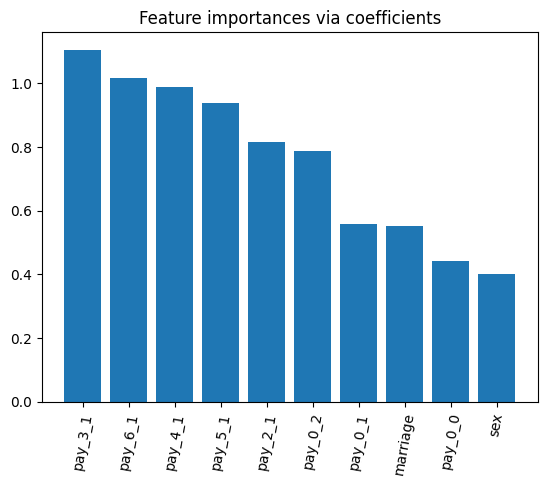

In [ ]:
plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

#ROC_AUC CURVE

In [ ]:
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]

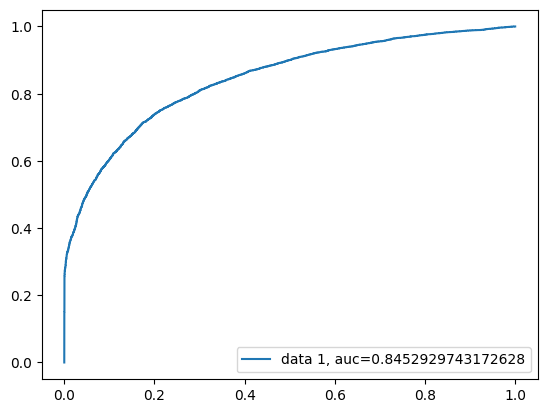

In [ ]:
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#DICISION TREE CLASSIFIER

In [ ]:
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X = df_fe.drop(['next_month_default','Payement_Value','Dues'],axis=1)
y = df_fe['next_month_default']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
grid_DTC_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_DTC_clf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50, 100],
                         'min_samples_split': [0.1, 0.2, 0.4]},
             scoring='accuracy', verbose=3)

In [ ]:
grid_DTC_clf.best_score_

np.float64(0.7216398751080364)

In [ ]:
optimal_DTC_clf = grid_DTC_clf.best_estimator_

In [ ]:
train_class_preds = optimal_DTC_clf.predict(X_train)
test_class_preds = optimal_DTC_clf.predict(X_test)

In [ ]:

train_accuracy_DTC = accuracy_score(train_class_preds,y_train)
test_accuracy_DTC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_DTC)
print("The accuracy on test data is ", test_accuracy_DTC)

The accuracy on train data is  0.7270071926685896
The accuracy on test data is  0.7301904973686161


Lower accuracy than logistic regression

#RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

In [ ]:
X = df_fe.drop(['next_month_default','Payement_Value','Dues'],axis=1)
y = df_fe['next_month_default']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
grid_RFC_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_RFC_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [ ]:
grid_RFC_clf.best_score_

np.float64(0.8419072879814301)

In [ ]:
optimal_RFC_clf = grid_RFC_clf.best_estimator_

In [ ]:
train_class_preds = optimal_RFC_clf.predict(X_train)
test_class_preds = optimal_RFC_clf.predict(X_test)

In [ ]:
train_accuracy_RFC = accuracy_score(train_class_preds,y_train)
test_accuracy_RFC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_RFC)
print("The accuracy on test data is ", test_accuracy_RFC)

The accuracy on train data is  0.9991602468144145
The accuracy on test data is  0.8603513453413387


In [ ]:
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.8603513453413387
The precision on test data is  0.8309859154929577
The recall on test data is  0.8828161915262246
The f1 on test data is  0.8561173056361693
The roc_score on test data is  0.8615985186138544


Best accuracy and f1 score

In [ ]:
from sklearn.metrics import fbeta_score

In [ ]:
fbeta_score(test_class_preds,y_test, beta=2)

0.8719392676021281

In [ ]:
len(optimal_RFC_clf.feature_importances_)

77

In [ ]:
y_preds_proba_rf = optimal_RFC_clf.predict_proba(X_test)[::,1]

In [ ]:
import sklearn.metrics as metrics

ROC-CURVE

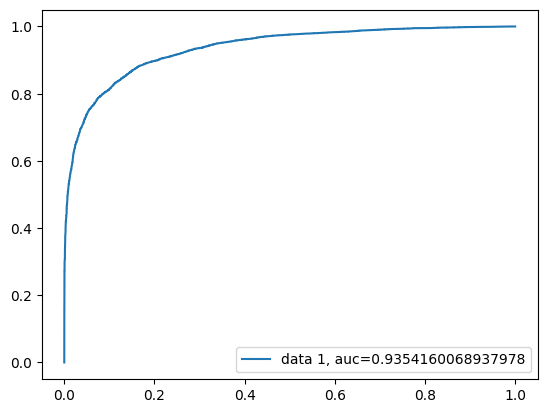

In [ ]:
y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve, fbeta_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np



precisions, recalls, thresholds = precision_recall_curve(y_test, y_preds_proba_rf)


f2_scores = (5 * precisions * recalls) / (4 * precisions + recalls + 1e-10)

best_index = np.argmax(f2_scores)
best_threshold = thresholds[best_index]
best_f2 = f2_scores[best_index]

print("Best Threshold for F2 Score:", best_threshold)
print("Best F2 Score:", best_f2)

optimized_preds_rf = (y_preds_proba_rf >= best_threshold).astype(int)


accuracy = accuracy_score(y_test, optimized_preds_rf)
precision = precision_score(y_test, optimized_preds_rf)
recall = recall_score(y_test, optimized_preds_rf)
f1 = f1_score(y_test, optimized_preds_rf)
f2 = fbeta_score(y_test, optimized_preds_rf, beta=2)
conf_matrix = confusion_matrix(y_test, optimized_preds_rf)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("F2 Score:", f2)
print("Confusion Matrix:\n", conf_matrix)


Best Threshold for F2 Score: 0.3201136363636364
Best F2 Score: 0.8971210838045629
Accuracy: 0.8160996219702024
Precision: 0.7523076923076923
Recall: 0.9424759080800593
F1 Score: 0.8367226061204344
F2 Score: 0.8971210838272651
Confusion Matrix:
 [[4653 2093]
 [ 388 6357]]


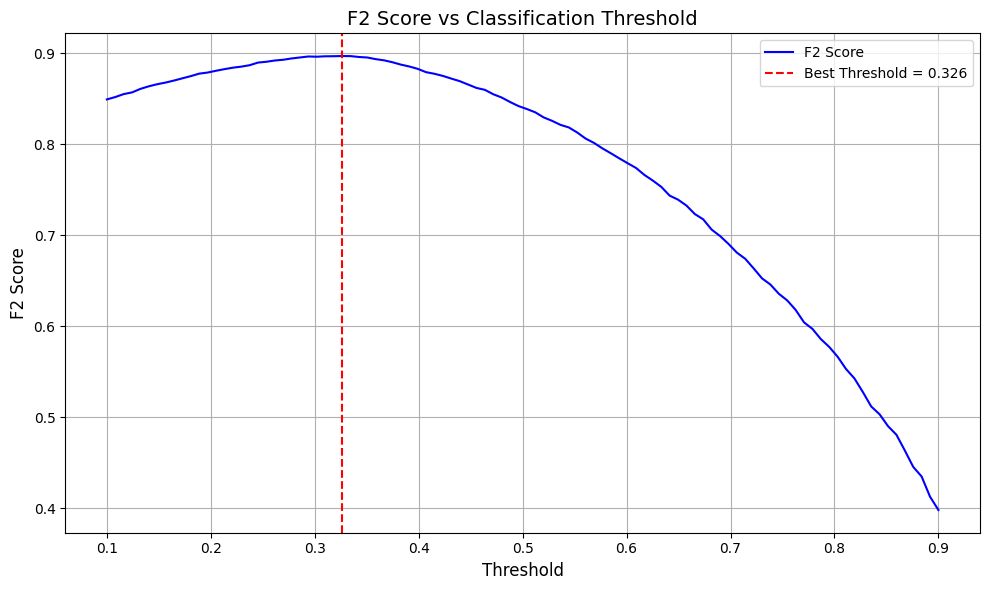

Best Threshold for F2 Score: 0.32626262626262625
Best F2 Score: 0.8969174208144797


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import fbeta_score



thresholds = np.linspace(0.1, 0.9, 100)
f2_scores = []

for thresh in thresholds:
    preds = (y_preds_proba_rf >= thresh).astype(int)
    f2 = fbeta_score(y_test, preds, beta=2)
    f2_scores.append(f2)


best_index = np.argmax(f2_scores)
best_threshold = thresholds[best_index]
best_f2 = f2_scores[best_index]


plt.figure(figsize=(10, 6))
plt.plot(thresholds, f2_scores, label="F2 Score", color="blue")
plt.axvline(x=best_threshold, color='red', linestyle='--', label=f'Best Threshold = {best_threshold:.3f}')
plt.title("F2 Score vs Classification Threshold", fontsize=14)
plt.xlabel("Threshold", fontsize=12)
plt.ylabel("F2 Score", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


print("Best Threshold for F2 Score:", best_threshold)
print("Best F2 Score:", best_f2)


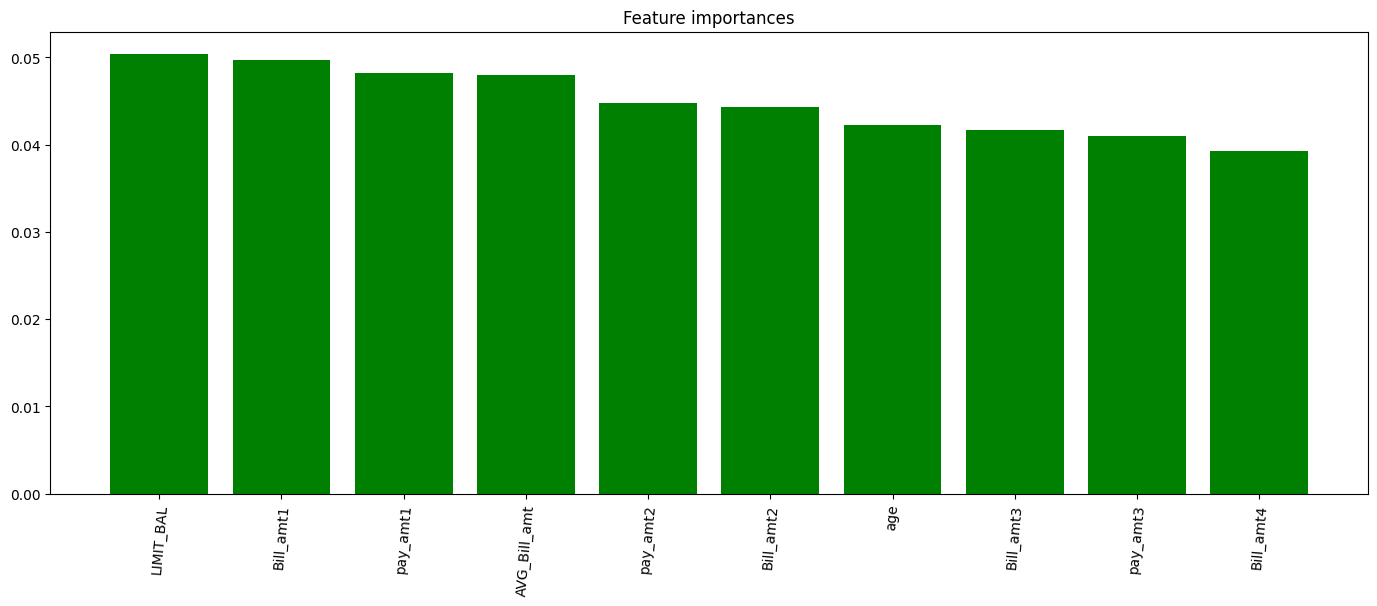

In [ ]:
feature_importances_rf = pd.DataFrame(optimal_RFC_clf.feature_importances_,
                                   index = columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]

plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="g",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

#XGBOOST

In [ ]:

import xgboost as xgb

In [ ]:
from xgboost import  XGBClassifier

In [ ]:
X = df_fe.drop(['next_month_default','Payement_Value','Dues'],axis=1)
y = df_fe['next_month_default']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_b...e,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=140,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [ ]:
gsearch1.best_score_

np.float64(0.841031063778511)

In [ ]:
optimal_xgb = gsearch1.best_estimator_

In [ ]:
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [ ]:
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

The accuracy on train data is  0.9360327138632297
The accuracy on test data is  0.8487880809428507


In [ ]:
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)
test_precision_xgb_tuned = precision_score(test_class_preds,y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds,y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on train data is ", test_roc_score_xgb_tuned)

The accuracy on test data is  0.8487880809428507
The precision on test data is  0.8163083765752409
The recall on test data is  0.872998255906136
The f1 on test data is  0.8437021146184492
The roc_score on train data is  0.8502658317392595


Almost same accuracy and f1 score as compared to randomforest

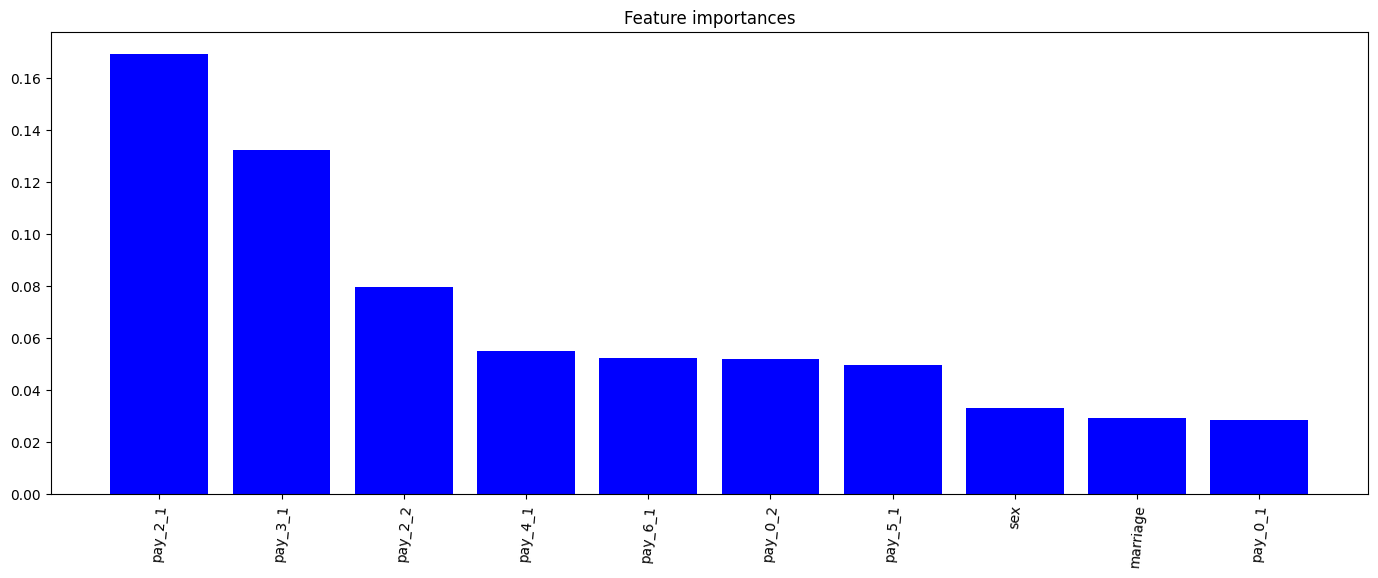

In [ ]:
feature_importances_xgb = pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]

plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'],
        color="b",  align="center")
plt.xticks(feature_importances_xgb.index, rotation = 85)

plt.show()



In [ ]:
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]

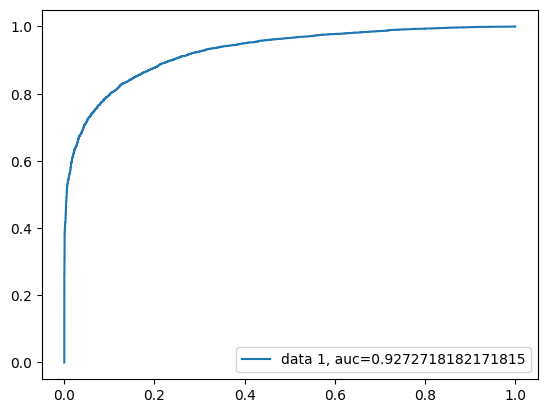

In [ ]:
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#Final Prediction

selected Random forest for final prediction because it give the best performance

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
val_df_scaled=scaler.fit_transform(val_df_copy)

In [ ]:
val_df.columns

Index(['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1',
       'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
       'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio'],
      dtype='object')

In [ ]:
val_preds_proba_rf = optimal_RFC_clf.predict_proba(val_df_scaled)[:, 1]


best_threshold = 0.32011
val_preds_rf = (val_preds_proba_rf >= best_threshold).astype(int)

In [ ]:
submission = pd.DataFrame({
    "Customer": val_df["Customer_ID"],
    "next_month_default": val_preds_rf
})
submission.to_csv("submission_21321028.csv", index=False)